In [1]:
import pandas as pd
import numpy as np

path= "C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/meta_info(full301cases).csv"
df = pd.read_csv(path)

In [2]:
df['is_clean'] = df['is_clean'].astype('category')
d = dict(enumerate(df['is_clean'].cat.categories))

df['is_clean_codes'] = df['is_clean'].cat.codes
df['is_clean'] = df['is_clean_codes'].map(d) 
#is_clean_codes: True = 1, False = 0

df['is_cancer'] = df['is_cancer'].astype('category')
d = dict(enumerate(df['is_cancer'].cat.categories))

df['is_cancer_codes'] = df['is_cancer'].cat.codes
df['is_cancer'] = df['is_cancer_codes'].map(d)
#is_cancer_codes: True = 2, False = 1, Ambiguous = 0

In [3]:
X = df[['nodule_no','malignancy','is_clean_codes']]
Y = df['is_cancer_codes']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

<b>KNN Regression</b>

In [6]:
#KNN Regression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

KNNregressor = KNeighborsRegressor(n_neighbors=5)
KNNregressor.fit(X_train, y_train)

KNeighborsRegressor()

In [7]:
y_pred_KNNR = KNNregressor.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_KNNR)
mse = mean_squared_error(y_test, y_pred_KNNR)
rmse = mean_squared_error(y_test, y_pred_KNNR, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.0016949152542372879
Mean Squared Error: 0.0007186440677966101
Root Mean Squared Error: 0.026807537518328872


In [9]:
KNNR_acc = KNNregressor.score(X_test, y_test)
print("Accuracy of KNNR: {:.2f}%".format(KNNR_acc*100))

Accuracy of KNNR: 99.82%


In [10]:
#various K values testing
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

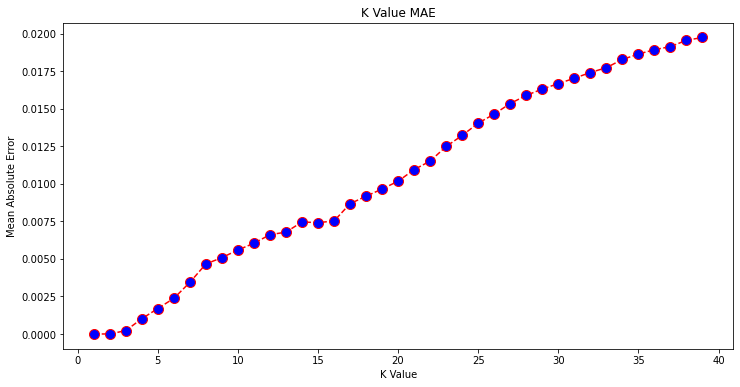

In [11]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

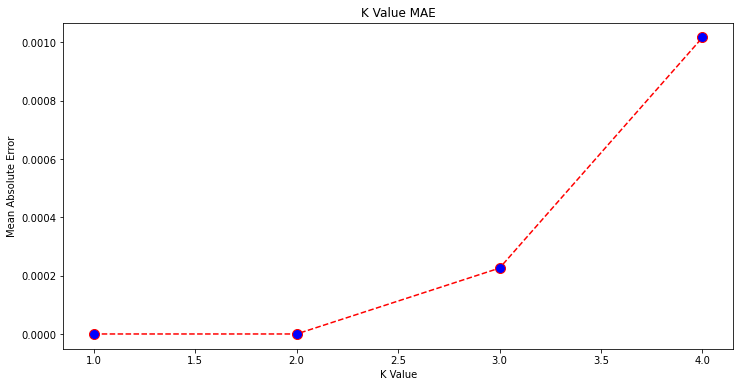

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error[:4], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [13]:
knn_reg2 = KNeighborsRegressor(n_neighbors=2)
knn_reg2.fit(X_train, y_train)
y_pred_KNNR_N2 = knn_reg2.predict(X_test)
r2 = knn_reg2.score(X_test, y_test) 

mae2 = mean_absolute_error(y_test, y_pred_KNNR_N2)
mse2 = mean_squared_error(y_test, y_pred_KNNR_N2)
rmse2 = mean_squared_error(y_test, y_pred_KNNR_N2, squared=False)
print(f'Accuracy of KNNr2: {format(r2*100)}%, \nMean Absolute Error:: {mae2} \nMean Squared Error: {mse2} \nRoot Mean Squared Error: {rmse2}')

Accuracy of KNNr2: 100.0%, 
Mean Absolute Error:: 0.0 
Mean Squared Error: 0.0 
Root Mean Squared Error: 0.0


In [14]:
KNNR_Classification_result = classification_report(y_test,y_pred_KNNR_N2)
print(KNNR_Classification_result)
#is_cancer_codes: True = 2, False = 1, Ambiguous = 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00      1756
           2       1.00      1.00      1.00       678

    accuracy                           1.00      2950
   macro avg       1.00      1.00      1.00      2950
weighted avg       1.00      1.00      1.00      2950



In [15]:
#KNNR Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

KNNR_cf_matrix = confusion_matrix(y_test, y_pred_KNNR_N2)

print(KNNR_cf_matrix)

[[ 516    0    0]
 [   0 1756    0]
 [   0    0  678]]


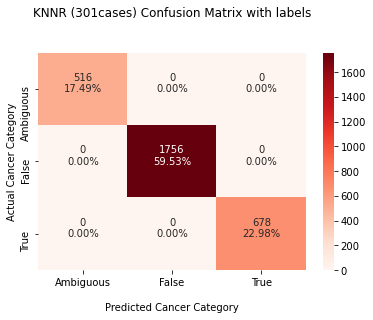

In [16]:
group_counts = ["{0:0.0f}".format(value) for value in
                KNNR_cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     KNNR_cf_matrix.flatten()/np.sum(KNNR_cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(KNNR_cf_matrix, annot=labels, fmt='', cmap='Reds') 

ax.set_title('KNNR (301cases) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

<b>KNN Model</b>

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred_KNN = KNNclassifier.predict(X_test)

In [19]:
KNN_acc =  KNNclassifier.score(X_test, y_test)
print("Accuracy of KNN: {:.2f}%".format(KNN_acc*100))

Accuracy of KNN: 99.93%


In [20]:
KNN_Classification_result = classification_report(y_test,y_pred_KNN)
print(KNN_Classification_result)
#is_cancer_codes: True = 2, False = 1, Ambiguous = 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00      1756
           2       1.00      1.00      1.00       678

    accuracy                           1.00      2950
   macro avg       1.00      1.00      1.00      2950
weighted avg       1.00      1.00      1.00      2950



In [21]:
#KNN Confusion Matrix
KNN_cf_matrix = confusion_matrix(y_test, y_pred_KNN)

print(KNN_cf_matrix)

[[ 516    0    0]
 [   2 1754    0]
 [   0    0  678]]


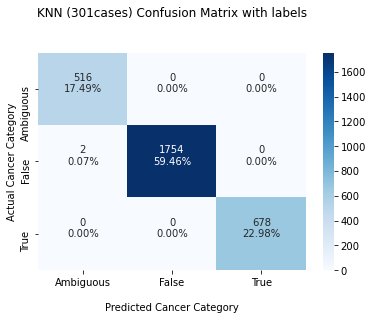

In [22]:
group_counts = ["{0:0.0f}".format(value) for value in
                KNN_cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     KNN_cf_matrix.flatten()/np.sum(KNN_cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(KNN_cf_matrix, annot=labels, fmt='', cmap='Blues') 

ax.set_title('KNN (301cases) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

<b>SVM with Linear Kernel</b>

In [23]:
#Linear Kernel
from sklearn import model_selection
from sklearn import svm
SVM = svm.SVC(kernel='linear', C=3).fit(X_train, y_train)

In [24]:
y_pred_SVM = SVM.predict(X_test)

In [25]:
SVM_acc =  SVM.score(X_test, y_test)
print("Accuracy of SVM Linear: {:.2f}%".format(SVM_acc*100))

Accuracy of SVM Linear: 100.00%


In [26]:
SVM_Classification_result = classification_report(y_test,y_pred_SVM)
print(SVM_Classification_result)
#is_cancer_codes: True = 2, False = 1, Ambiguous = 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00      1756
           2       1.00      1.00      1.00       678

    accuracy                           1.00      2950
   macro avg       1.00      1.00      1.00      2950
weighted avg       1.00      1.00      1.00      2950



In [27]:
#SVM with linear Confusion Matrix
SVM_cf_matrix = confusion_matrix(y_test, y_pred_SVM)

print(SVM_cf_matrix)

[[ 516    0    0]
 [   0 1756    0]
 [   0    0  678]]


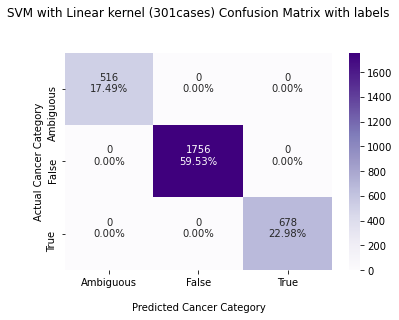

In [28]:
group_counts = ["{0:0.0f}".format(value) for value in
                SVM_cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     SVM_cf_matrix.flatten()/np.sum(SVM_cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(SVM_cf_matrix, annot=labels, fmt='', cmap='Purples') 

ax.set_title('SVM with Linear kernel (301cases) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

<b>SVM with RBF Kernel</b>

In [29]:
SVM_rbf = svm.SVC(kernel='rbf',gamma=0.1).fit(X_train, y_train)

In [30]:
y_pred_SVM_rbf = SVM_rbf.predict(X_test)

In [31]:
SVM_rbfacc =  SVM_rbf.score(X_test, y_test)
print("Accuracy of SVM RBF: {:.2f}%".format(SVM_rbfacc*100))

Accuracy of SVM RBF: 100.00%


In [32]:
SVMrbf_Classification_result = classification_report(y_test,y_pred_SVM_rbf)
print(SVMrbf_Classification_result)
#is_cancer_codes: True = 2, False = 1, Ambiguous = 0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00      1756
           2       1.00      1.00      1.00       678

    accuracy                           1.00      2950
   macro avg       1.00      1.00      1.00      2950
weighted avg       1.00      1.00      1.00      2950



In [33]:
#Confusion Matrix of the SVM RBF Model 
SVMrbf_cf_matrix = confusion_matrix(y_test, y_pred_SVM_rbf)

print(SVMrbf_cf_matrix)

[[ 516    0    0]
 [   0 1756    0]
 [   0    0  678]]


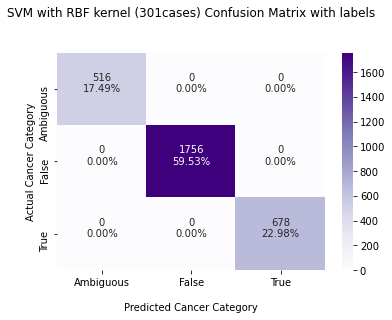

In [34]:
group_counts = ["{0:0.0f}".format(value) for value in
                SVMrbf_cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     SVMrbf_cf_matrix.flatten()/np.sum(SVMrbf_cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(SVMrbf_cf_matrix, annot=labels, fmt='', cmap='Purples') 

ax.set_title('SVM with RBF kernel (301cases) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

<b>SVM with Polynomial Kernel</b>

In [35]:
SVM_poly = svm.SVC(kernel='poly',degree=1).fit(X_train, y_train)

In [36]:
y_pred_SVM_poly = SVM_poly.predict(X_test)

In [37]:
SVM_polyacc =  SVM_poly.score(X_test, y_test)
print("Accuracy of SVM Polynomial: {:.2f}%".format(SVM_polyacc*100))

Accuracy of SVM Polynomial: 72.44%


In [38]:
SVMpoly_Classification_result = classification_report(y_test,y_pred_SVM_poly)
print(SVMpoly_Classification_result)
#is_cancer_codes: True = 2, False = 1, Ambiguous = 0

              precision    recall  f1-score   support

           0       0.24      0.02      0.04       516
           1       0.99      0.83      0.90      1756
           2       0.47      1.00      0.64       678

    accuracy                           0.72      2950
   macro avg       0.57      0.61      0.53      2950
weighted avg       0.74      0.72      0.69      2950



In [39]:
#Confusion Matrix of the SVM Polynomial Model 
SVMpoly_cf_matrix = confusion_matrix(y_test, y_pred_SVM_poly)

print(SVMpoly_cf_matrix)

[[  11    9  496]
 [  35 1450  271]
 [   0    2  676]]


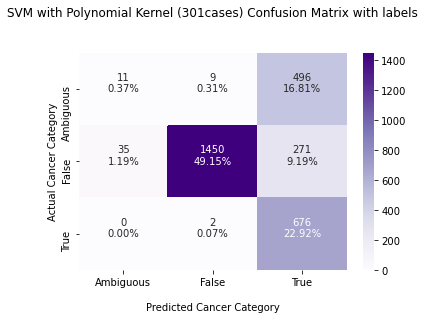

In [40]:
group_counts = ["{0:0.0f}".format(value) for value in
                SVMpoly_cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     SVMpoly_cf_matrix.flatten()/np.sum(SVMpoly_cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(SVMpoly_cf_matrix, annot=labels, fmt='', cmap='Purples') 

ax.set_title('SVM with Polynomial Kernel (301cases) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()